In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_exp= pd.read_csv('/content/expenses.csv')
display(df_exp.head())

,Date,Amount,Category,Description
0,2025-01-02,450,Food,Grocery shopping
1,2025-01-03,120,Transport,Bus pass recharge
2,2025-01-05,900,Utilities,Electricity bill
3,2025-01-07,150,Entertainment,Movie ticket
4,2025-01-10,600,Food,Restaurant dinner


In [7]:
df_exp.isnull().sum()

,0
Date,0
Amount,0
Category,0
Description,0


In [8]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         34 non-null     object
 1   Amount       34 non-null     int64 
 2   Category     34 non-null     object
 3   Description  34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [9]:
df_exp.describe()

,Amount
count,34.000000
mean,562.352941
std,388.751372
min,100.000000
25%,262.500000
50%,450.000000
75%,775.000000
max,1500.000000


In [13]:
df_exp['Date'] = pd.to_datetime(df_exp['Date'])

In [14]:
df_exp.isnull().sum()

,0
Date,0
Amount,0
Category,0
Description,0


In [17]:
missing_values = df_exp.isnull().sum()
if missing_values.sum() == 0:
    print("There are no missing values in the DataFrame.")
else:
    print("Missing Values:\n", missing_values)

There are no missing values in the DataFrame.


In [21]:
df_exp['Month'] = df_exp['Date'].dt.strftime('%Y-%m')
monthly_totals = df_exp.groupby('Month')['Amount'].sum()
print("\nMonthly Expense Totals:\n", monthly_totals)


Monthly Expense Totals:
 Month
2025-01    7020
2025-02    6950
2025-03    5150
Name: Amount, dtype: int64


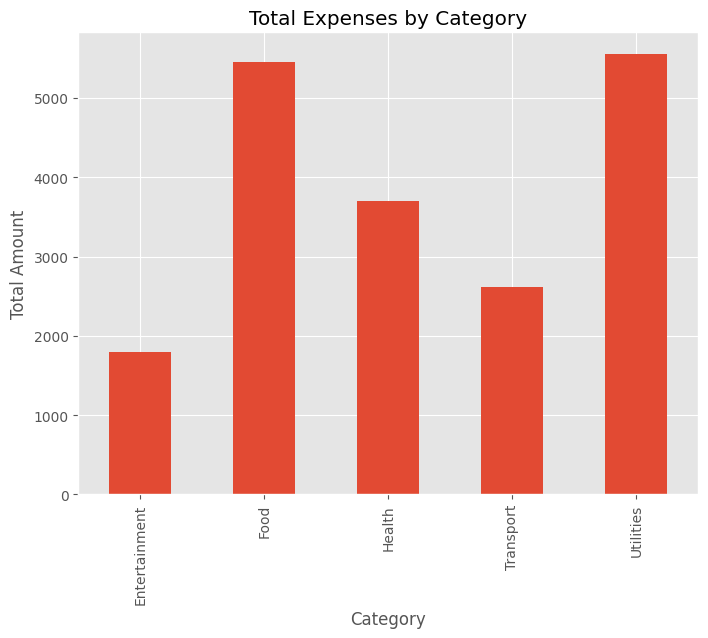

In [23]:
plt.figure(figsize=(8,6))
df_exp.groupby('Category')['Amount'].sum().plot(kind='bar')
plt.title("Total Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.show()

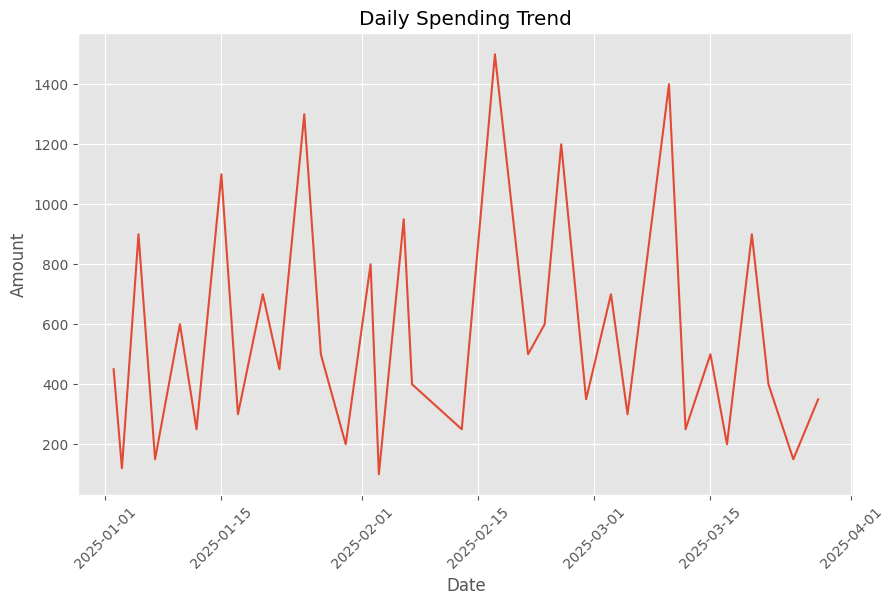

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_exp['Date'], df_exp['Amount'])
plt.title("Daily Spending Trend")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

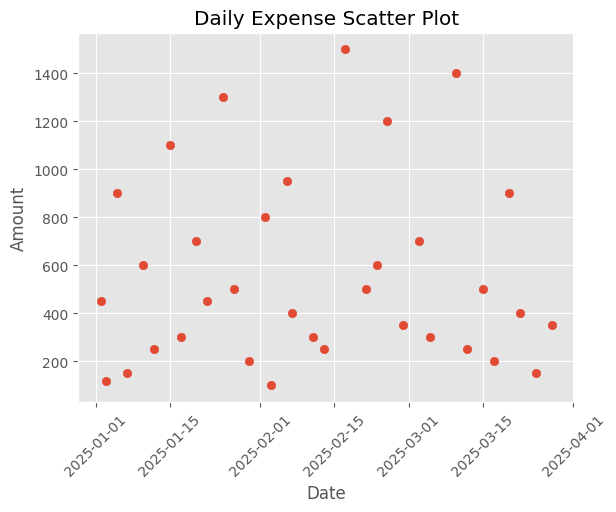

In [ ]:
df_exp["Date"] = pd.to_datetime(df_exp["Date"])

plt.scatter(df_exp["Date"], df_exp["Amount"])
plt.title("Daily Expense Scatter Plot")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

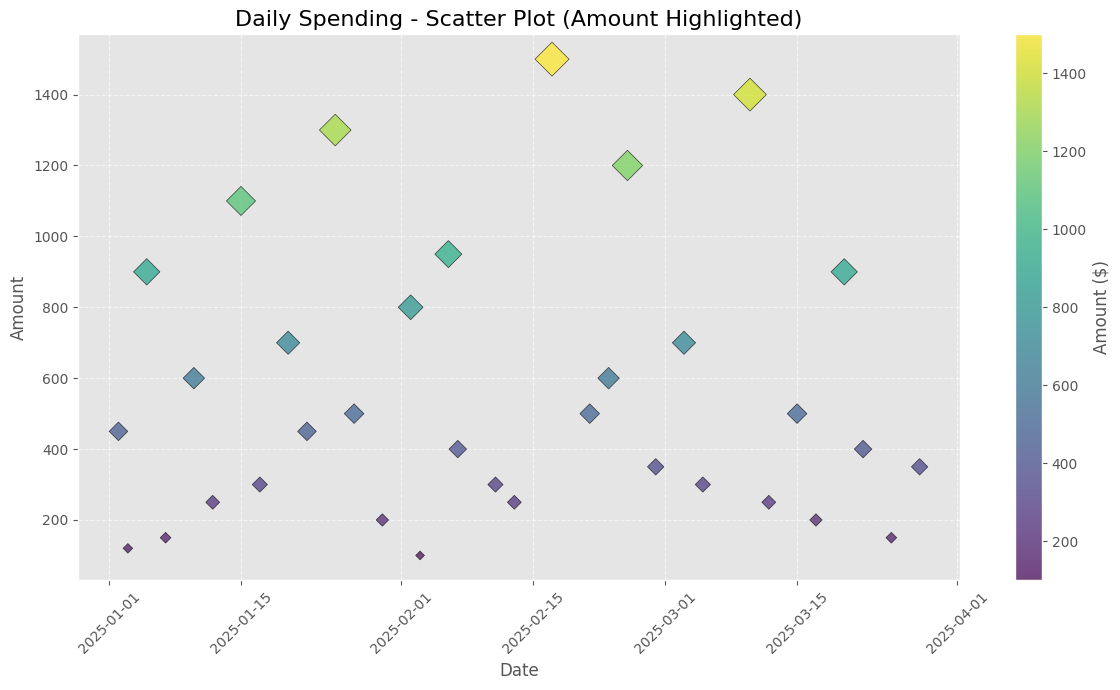

In [29]:
plt.figure(figsize=(12, 7))
plt.scatter(df_exp['Date'], df_exp['Amount'],
            marker='D',
            s=df_exp['Amount'] /
            c=df_exp['Amount'],
            cmap='viridis',
            alpha=0.7,
            edgecolor='black')
plt.title("Daily Spending - Scatter Plot (Amount Highlighted)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(label='Amount').set_label('Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

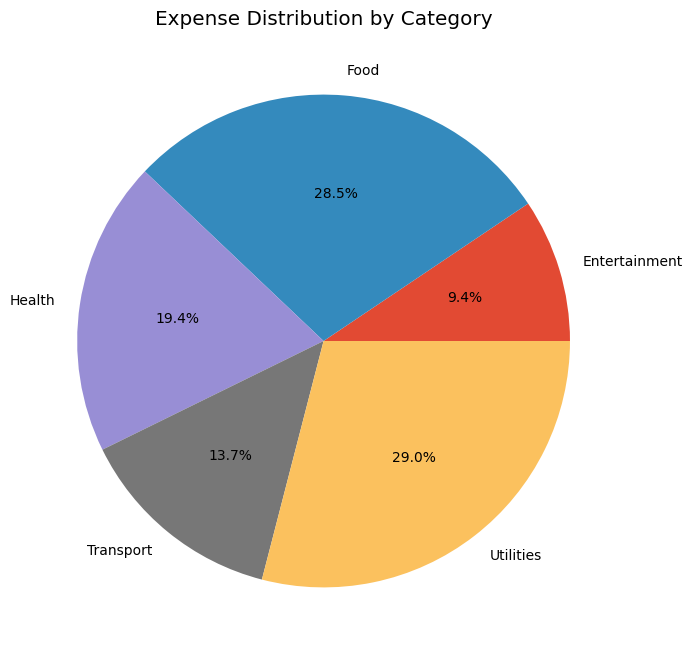

In [33]:
plt.figure(figsize=(8,8))
df_exp.groupby('Category')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.show()

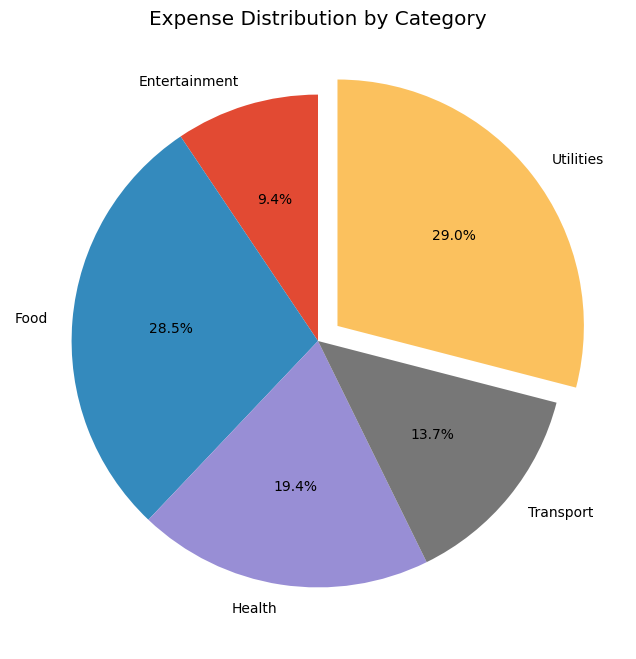

In [36]:
category_sums = df_exp.groupby('Category')['Amount'].sum()
max_category = category_sums.idxmax()

explode = [0.1 if category == max_category else 0 for category in category_sums.index]

plt.figure(figsize=(8,8))
category_sums.plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=90)
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.show()

### Insights on Exploded Category

Based on the exploded pie chart, the category with the highest percentage of expenses is likely a significant area where you spend your money. This could indicate:

*   **Major Spending Area:** This category represents a primary focus of your financial outflow.
*   **Potential for Savings:** If this category is discretionary, it might be an area to review for potential cost-saving opportunities.
*   **Essential Spending:** If it's a necessary expense (like utilities or housing), it highlights a core part of your budget.

Further analysis on this specific category could involve looking into the individual transactions within it to understand the sub-categories or specific items driving these expenses.

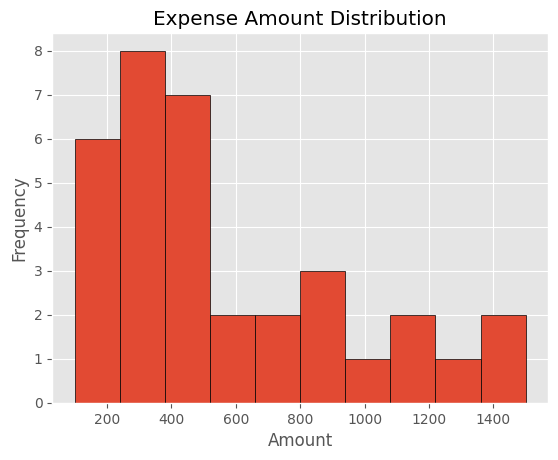

In [39]:
plt.hist(df_exp["Amount"], bins=10, edgecolor="black")
plt.title("Expense Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


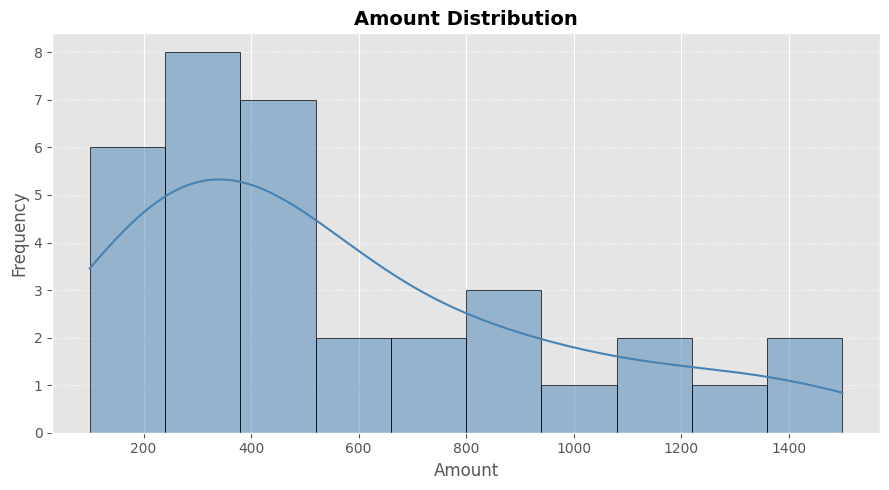

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(df_exp["Amount"], bins=10, kde=True, color="steelblue", edgecolor="black")
plt.title("Amount Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


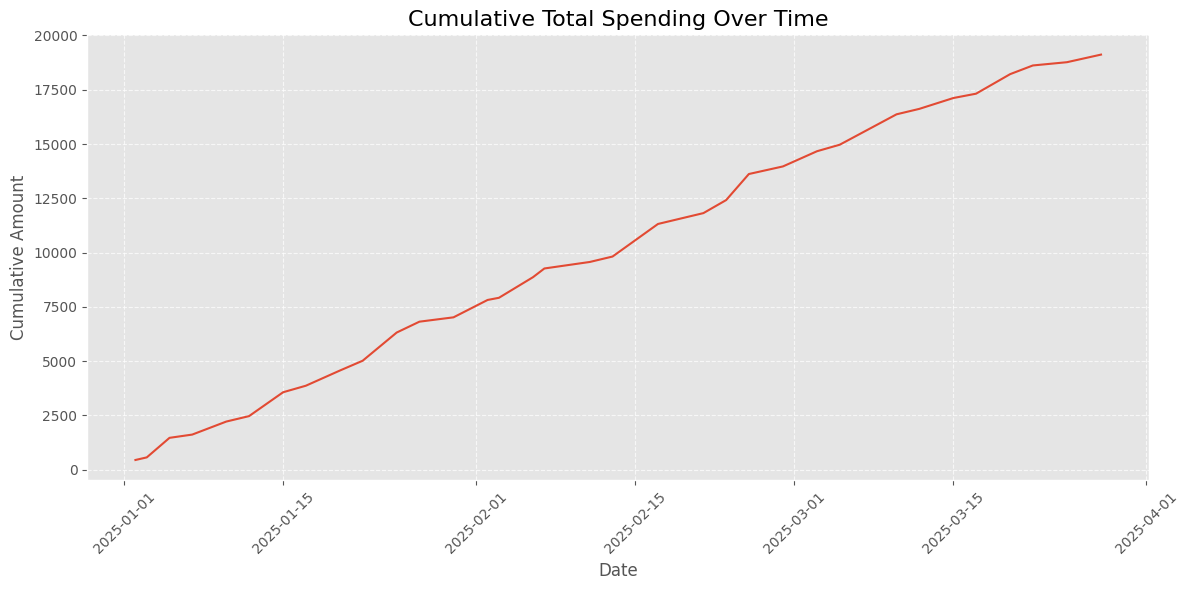

In [46]:
df_exp = df_exp.sort_values("Date")
df_exp["Cumulative"] = df_exp["Amount"].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_exp, x="Date", y="Cumulative")
plt.title("Cumulative Total Spending Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Amount", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2405799634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_exp, x="Day", y="Amount", estimator="mean", palette="viridis", errorbar=None)


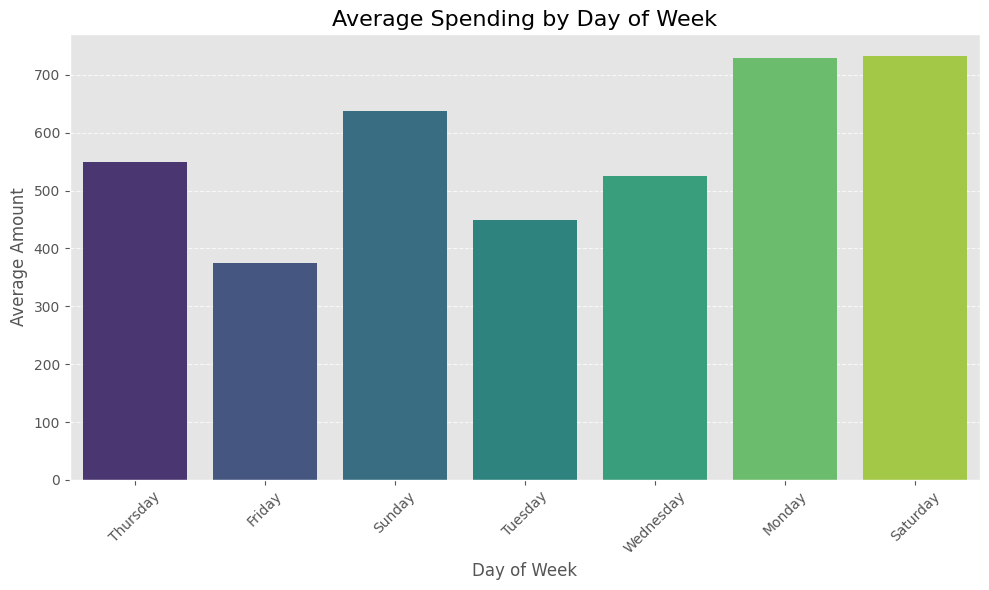

In [50]:
df_exp["Day"] = df_exp["Date"].dt.day_name()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_exp, x="Day", y="Amount", estimator="mean", palette="viridis", errorbar=None)
plt.title("Average Spending by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Amount", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

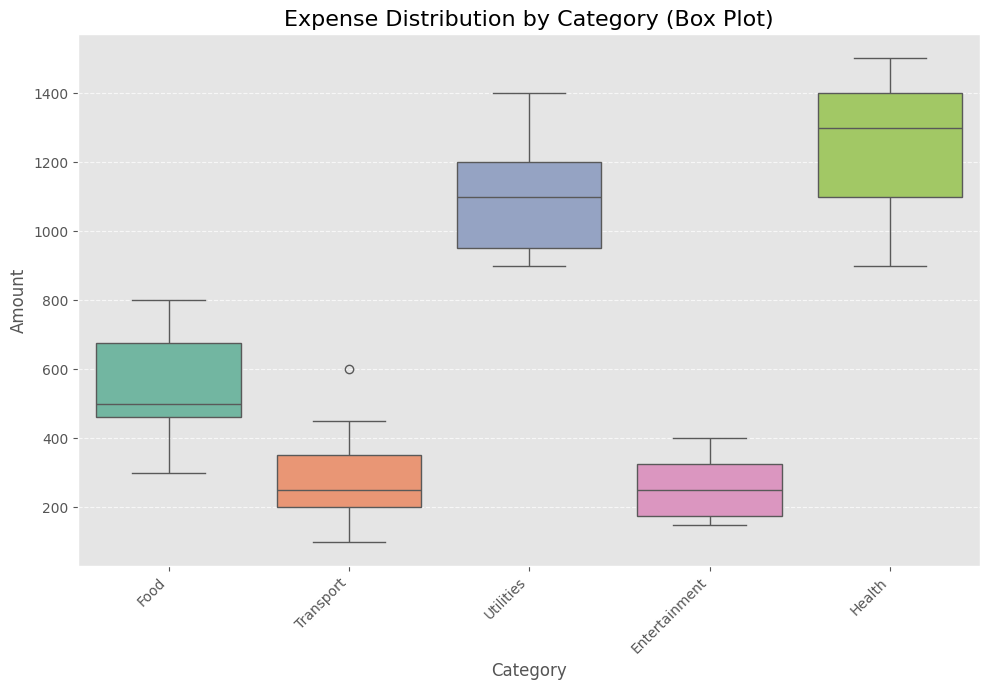

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_exp, x="Category", y="Amount", palette="Set2", hue="Category", legend=False) # Added hue and legend=False
plt.title("Expense Distribution by Category (Box Plot)", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis of Expense Distribution by Category (Box Plot)

The box plot reveals how your expenses are spread out by category, showing typical spending, the range of most expenses, and any unusually high or low amounts. This helps quickly identify stable versus variable spending areas.

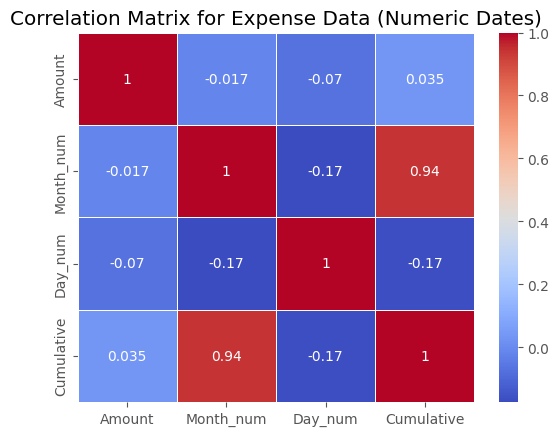

In [55]:
df_exp['Day_num'] = df_exp['Date'].dt.dayofweek
df_exp['Month_num'] = df_exp['Date'].dt.month

corr = df_exp[["Amount", "Month_num", "Day_num", "Cumulative"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Expense Data (Numeric Dates)")
plt.show()

**SUMMARY**

*   **Data Loading & Preparation:** Initially loaded expense data, addressing file format and variable naming errors. Performed crucial data cleaning by converting the 'Date' column to datetime objects and confirmed the absence of missing values.
*   **Exploratory Data Analysis (EDA):** Calculated and displayed monthly expense totals, providing a foundational overview of spending patterns.
*   **Categorical Spending Analysis:** Visualized total expenses by category using both a bar chart and an enhanced pie chart, which effectively highlighted the largest spending category by exploding its slice.
*   **Temporal Spending Trends:** Explored daily spending trends through a line plot, a visually enhanced scatter plot (using diamond markers, variable size, and color to denote amount), and a cumulative spending line plot to observe overall expenditure growth.
*   **Distribution Analysis:** Illustrated the frequency distribution of expense amounts using a histogram, offering insights into common spending ranges.
*   **Daily and Categorical Averages:** Analyzed average spending by the day of the week using a refined bar plot and examined expense distribution by category with an appealing box plot, identifying typical spending, variability, and potential outliers.
*   **Correlation Analysis:** Generated a correlation heatmap to understand relationships between numerical features.
*   **Interpretive Insights:** Provided concise analyses for both the exploded pie chart and the detailed box plot, translating visual data into actionable understanding of spending behavior.


The overarching motive of this expense analysis is to gain a clear understanding of spending habits. By visualizing and summarizing financial data, individuals or organizations can identify where money is being spent, pinpoint areas for potential savings, track financial health, and make more informed budgeting decisions.